In [3]:
import pandas as pd

df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Removing null values 

Segregating seperate numerical and categorical values


In [42]:
numerical_col = df.columns[0]
print(df[numerical_col])


0    -1.510053
1    -1.438373
2    -1.366693
3    -1.187494
4    -1.115814
5    -0.864935
6    -0.829096
7    -0.757416
8    -0.757416
9    -0.578216
10   -0.506537
11   -0.470697
12   -0.470697
13   -0.434857
14   -0.291498
15   -0.148138
16   -0.076458
17   -0.004779
18    0.210261
19    0.246100
20    0.532819
21    0.640339
22    0.927058
23    1.034577
24    1.213777
25    1.321296
26    1.500496
27    1.536336
28    1.787215
29    1.858894
Name: YearsExperience, dtype: float64


In [9]:
# Handling missing values
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='mean')

df[numerical_col] = impute.fit_transform(df[numerical_col])

print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


No categorical values to convert to apply encoding 

In [14]:
# lets do feature scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df


,YearsExperience,Salary
0,-1.510053,39343.0
1,-1.438373,46205.0
2,-1.366693,37731.0
3,-1.187494,43525.0
4,-1.115814,39891.0
5,-0.864935,56642.0
6,-0.829096,60150.0
7,-0.757416,54445.0
8,-0.757416,64445.0
9,-0.578216,57189.0


Splitting data to train and test split  

In [66]:
X = df[[numerical_col]]
target_col = df.columns[[1]]
y = df[target_col]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)



In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

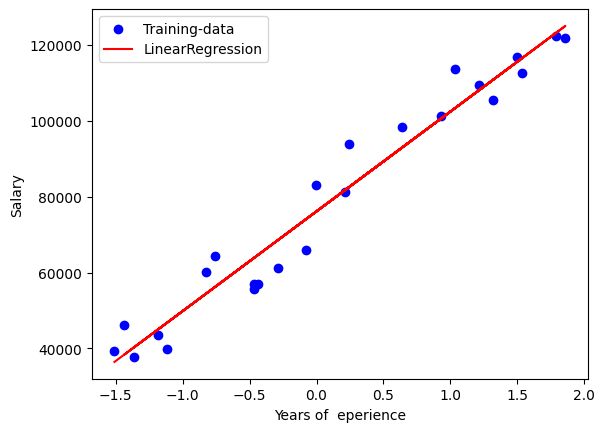

In [79]:
# y_pred = model.predict(X_train) 

import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color='blue',label='Training-data')
plt.plot(X_train,model.predict(X_train),color='red',label='LinearRegression')

plt.xlabel('Years of  eperience')
plt.ylabel('Salary')

plt.legend()
# plt.show()

Calculating performance measures 

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean absolute error is",mae)
print("mean_squared_error is",mse)
print("r2_score is",r2)


Mean absolute error is 2509.936725709551
mean_squared_error is 8188222.841623586
r2_score is 0.949287194756826
